In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import probplot, norm

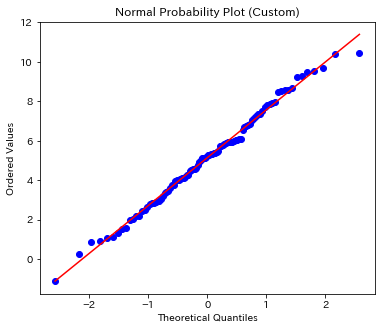

In [2]:
# 平均値5、標準偏差2.4の正規分布データを生成
np.random.seed(0)
data = np.random.normal(loc=5, scale=2.4, size=100)

# データを昇順にソート
sorted_data = np.sort(data)

# 累積分布関数 (CDF) の値（そのデータ点より小さいデータ点の割合）を計算
cdf_values = [(i + 0.5) / len(sorted_data) for i in range(len(sorted_data))]

# 累積分布関数 (CDF) の値に対応する標準正規分布の理論値を計算
z_scores = norm.ppf(cdf_values)

# 正規確率プロットを1次近似
slope, intercept = np.polyfit(z_scores, sorted_data, 1)
z_values_for_line = np.array([np.min(z_scores), np.max(z_scores)])
data_values_for_line = slope * z_values_for_line + intercept

# グラフを作成
plt.figure(figsize=(6, 5))
plt.scatter(z_scores, sorted_data, c='blue')
plt.plot(z_values_for_line, data_values_for_line, 'r-')  # 赤い直線
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.title('Normal Probability Plot (Custom)')
plt.savefig('Normal Probability Plot (Custom).png', facecolor='white', dpi=100)

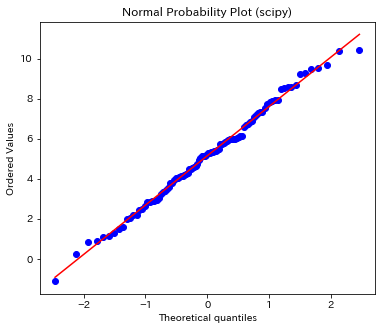

In [3]:
# scipyのprobplotでプロット
plt.figure(figsize=(6, 5))
probplot(data, dist="norm", plot=plt)
plt.title("Normal Probability Plot (scipy)")
plt.savefig('Normal Probability Plot (scipy).png', facecolor='white', dpi=100)

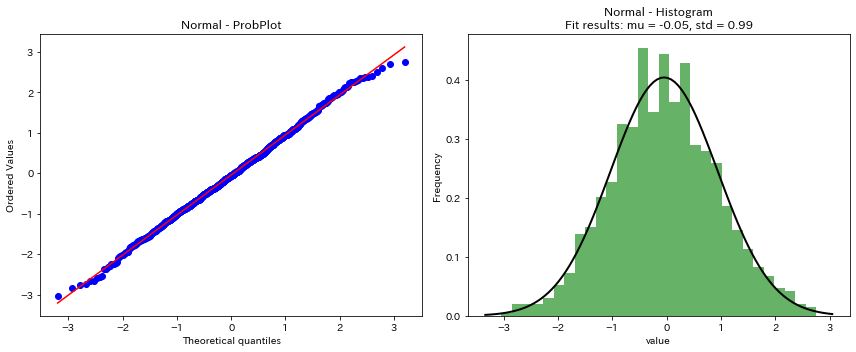

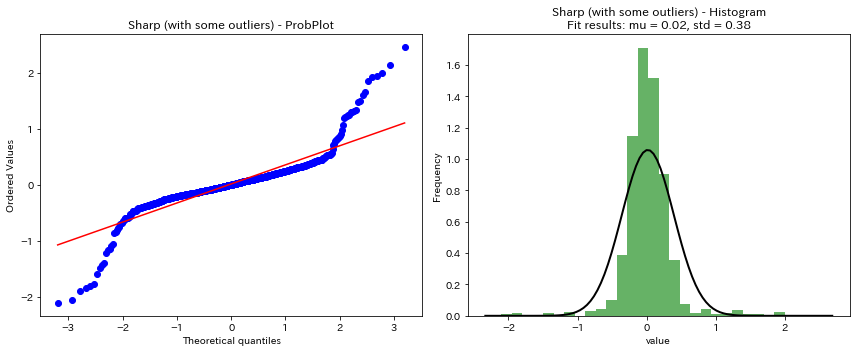

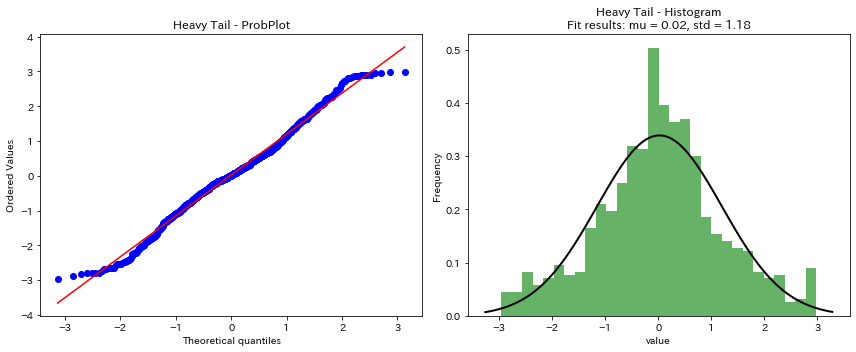

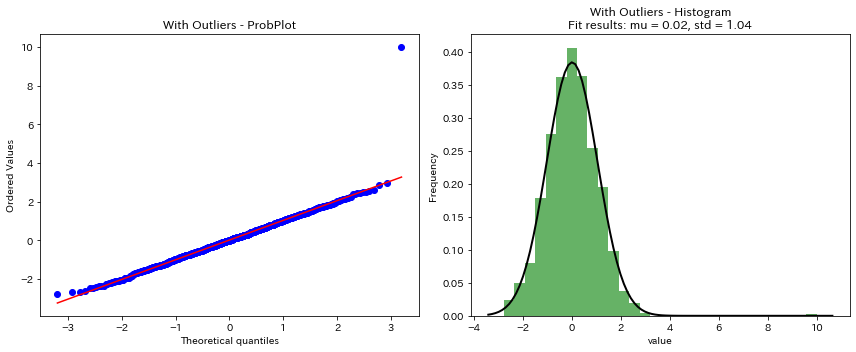

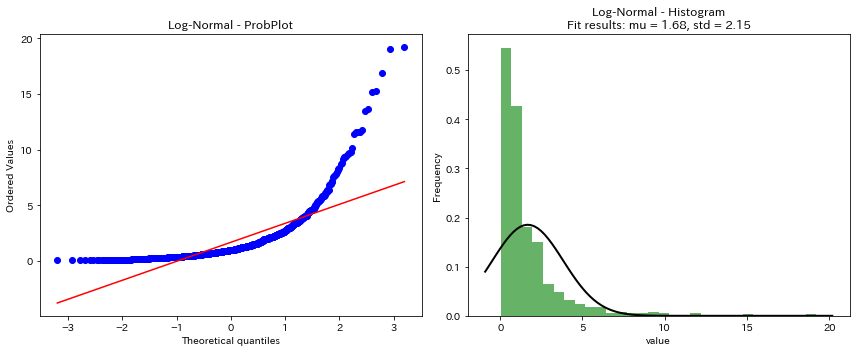

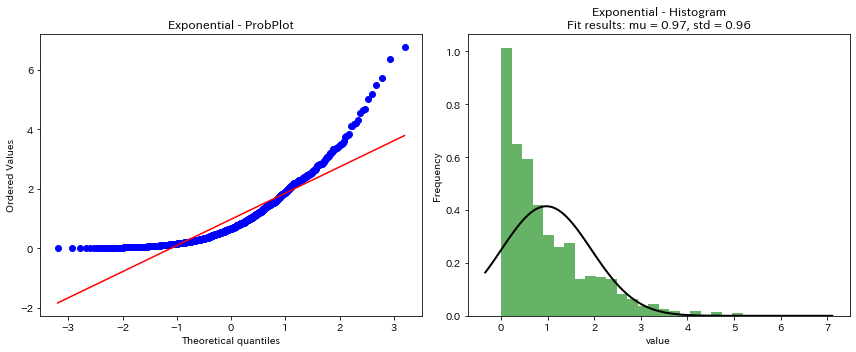

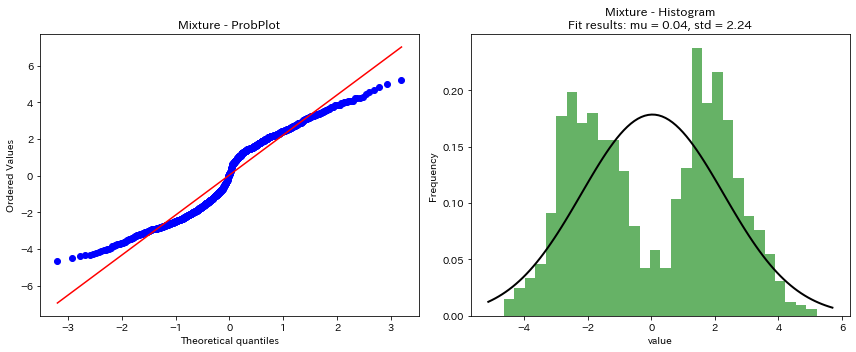

In [4]:
np.random.seed(0)

# データ生成
N = 1000
normal_data = np.random.normal(0, 1, N)
sharp_data = [np.random.normal(0, 0.2) if np.random.rand() > 0.1 else np.random.normal(0, 1) for _ in range(N)]
heavy_tail_data_raw = np.random.standard_cauchy(N)
heavy_tail_data = heavy_tail_data_raw[np.abs(heavy_tail_data_raw) < 3]# 絶対値が3以上のデータを取り除く
outlier_data = np.random.normal(0, 1, N)
outlier_data[500] = 10  # 外れ値を追加
lognormal_data = np.random.lognormal(0, 1, N)
exponential_data = np.random.exponential(1, N)
mixture_data = [np.random.normal(-2, 1) if np.random.rand() > 0.5 else np.random.normal(2, 1) for _ in range(N)]
datasets = [normal_data, sharp_data, heavy_tail_data, outlier_data, lognormal_data, exponential_data, mixture_data]
titles = ['Normal', 'Sharp (with some outliers)', 'Heavy Tail', 'With Outliers', 'Log-Normal', 'Exponential', 'Mixture']

# 各データセットに対するプロット
for i, (data, title) in enumerate(zip(datasets, titles)):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # 正規確率プロット
    probplot(data, dist="norm", plot=axes[0])
    axes[0].set_title(title + ' - ProbPlot')
    
    # ヒストグラム
    n, bins, patches = axes[1].hist(data, bins=30, density=True, alpha=0.6, color='g')
    mu, std = norm.fit(data)
    xmin, xmax = axes[1].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    axes[1].plot(x, p, 'k', linewidth=2)
    axes[1].set_xlabel('value')
    axes[1].set_ylabel('Frequency')
    title_hist = f"{title} - Histogram\nFit results: mu = {mu:.2f}, std = {std:.2f}"
    axes[1].set_title(title_hist)
    # 保存
    plt.tight_layout()
    plt.savefig(f"{title.replace(' ', '_').lower()}_qqplot.png", facecolor='white', dpi=100)
plt.show()